# Problem Statement
Stayze is an online market for providing lodging or primary homestays. The company does not own any real estate or properties, it acts as a broker receiving commission from each booking. The hosts rent out their property, its availability, area, type of room, price etc. and the travellers can book accordingly. The travellers put in their reviews, which is visible to others. People have used this service extensively and the company is recognized throughout the globe. All the online activities of the hosts as well as the travellers are being captured and have resulted in a rich database.

This data can be used to gain business insights, make decisions, improve security, understand the customers' and providers' (hosts) behaviour and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

The stakeholders with the help of the available data want to know the ideal prices at which the properties can be rented, as it will help them decide upon the ideal investment to be done.

## Business Understanding
**Business Impact**

**Stakeholders**
1. Chief Marketing Officer
2. Sales & Marketing Team

## Data Understanding


## Data Science Problem ##

The aim of this project is to propose a data-driven solution, by using machine learning to predict homestays rental price.

p.s. Foursquare API is used for the rental prices vs property proximity to certain venues, we use the Foursquare API to access the city's venues and the street network, available though OpenStreepMap (OSM).

## Evaluation Metric ##

*Caution: This is only a reference template and not the entire DS pipeline*

#### Install required packages ####

In [5]:
# general required packages
import sys
!{sys.executable} -m pip install geopandas
!{sys.executable} -m pip install geocoder
!{sys.executable} -m pip install geopy
!{sys.executable} -m pip install folium
!{sys.executable} -m pip install datetime
!{sys.executable} -m pip install seaborn
# packages for neighbourhood analysis
!{sys.executable} -m pip install geopandas
!{sys.executable} -m pip install descartes
!{sys.executable} -m pip install requests
# package to run geopandas
!conda install -c conda-forge libspatialindex -y

  Using cached geopandas-0.8.1-py2.py3-none-any.whl (962 kB)
  Using cached Shapely-1.7.1-cp37-cp37m-win_amd64.whl (1.0 MB)
  Using cached Fiona-1.8.17.tar.gz (1.3 MB)


    ERROR: Command errored out with exit status 1:
     command: 'D:\anaconda\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Admin\\AppData\\Local\\Temp\\pip-install-eheabp78\\fiona\\setup.py'"'"'; __file__='"'"'C:\\Users\\Admin\\AppData\\Local\\Temp\\pip-install-eheabp78\\fiona\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Admin\AppData\Local\Temp\pip-install-eheabp78\fiona\pip-egg-info'
         cwd: C:\Users\Admin\AppData\Local\Temp\pip-install-eheabp78\fiona\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
    ----------------------------------------
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command ou

In [16]:
import os
print(os.getcwd())


C:\Users\Admin\GreyAtom\Hackathon


**Import necessary libraries**

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats.mstats import winsorize

**Read the input file**

In [118]:
sz = pd.read_csv('c:/users/Admin/GreyAtom/Hackathon/Stayz_Train.csv')

**Basic understanding of data**

In [119]:
sz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34226 entries, 0 to 34225
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              34226 non-null  int64  
 1   name                            34214 non-null  object 
 2   host_id                         34226 non-null  int64  
 3   host_name                       34213 non-null  object 
 4   neighbourhood_group             34226 non-null  object 
 5   neighbourhood                   34226 non-null  object 
 6   latitude                        34226 non-null  float64
 7   longitude                       34226 non-null  float64
 8   room_type                       34226 non-null  object 
 9   price                           34226 non-null  int64  
 10  minimum_nights                  34226 non-null  int64  
 11  number_of_reviews               34226 non-null  int64  
 12  last_review                     

In [120]:
sz.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.422600e+04,3.422600e+04,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,27244.000000,34226.000000,34226.000000
mean,1.898209e+07,6.733847e+07,40.729059,-73.952070,153.480979,6.953690,23.390931,1.377074,7.093905,113.301730
std,1.097597e+07,7.833091e+07,0.054604,0.046161,243.312608,20.255833,44.476822,1.688953,32.828412,131.892814
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.460366e+06,7.824440e+06,40.690040,-73.983150,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.965371e+07,3.065628e+07,40.722995,-73.955700,107.000000,2.000000,5.000000,0.730000,1.000000,45.000000
75%,2.908201e+07,1.074344e+08,40.763200,-73.935982,175.000000,5.000000,24.000000,2.020000,2.000000,229.000000
max,3.648724e+07,2.743115e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [121]:
sz.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,5728806,Large private room in Nolita,4271676,Nat,Manhattan,Nolita,40.72217,-73.99481,Private room,120,7,3,2015-09-01,0.06,3,0
1,2243769,Super Bowl New York City Apartment,11460768,Brian,Manhattan,Upper West Side,40.80020,-73.96045,Entire home/apt,1500,1,0,NaN,NaN,1,0
2,35515415,COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION,267193767,Jenny,Queens,East Elmhurst,40.75558,-73.89316,Entire home/apt,200,2,4,2019-07-05,4.00,1,365
3,36202006,Stream-Pressed Paradise (Laundry Room Setup),43392243,Rita,Staten Island,Concord,40.60110,-74.07830,Shared room,30,2,0,NaN,NaN,4,82
4,3780951,Charming Harlem apartment,16065171,Gina,Manhattan,Harlem,40.81022,-73.94266,Shared room,115,1,16,2019-05-26,0.27,1,365


**Scatter plot for Lat-Long**

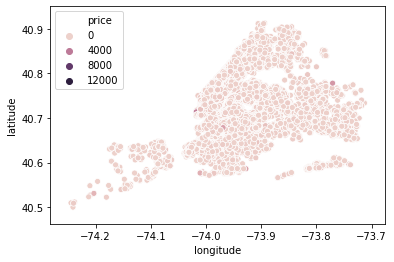

In [122]:
sns.scatterplot(data=sz,x='longitude',y='latitude',hue='price',alpha='auto')
plt.show()

**Drop unncessary coloumns**

In [123]:
sz.drop(['id','name','host_id','host_name'],axis=1,inplace=True)

In [124]:
sz.isnull()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
34221,False,False,False,False,False,False,False,False,False,False,False,False
34222,False,False,False,False,False,False,False,False,False,False,False,False
34223,False,False,False,False,False,False,False,False,False,False,False,False
34224,False,False,False,False,False,False,False,False,True,True,False,False


**Date Time formatting**

In [125]:
sz['last_review'].head()

0    2015-09-01
1           NaN
2    2019-07-05
3           NaN
4    2019-05-26
Name: last_review, dtype: object

**Histograms of numeric data**

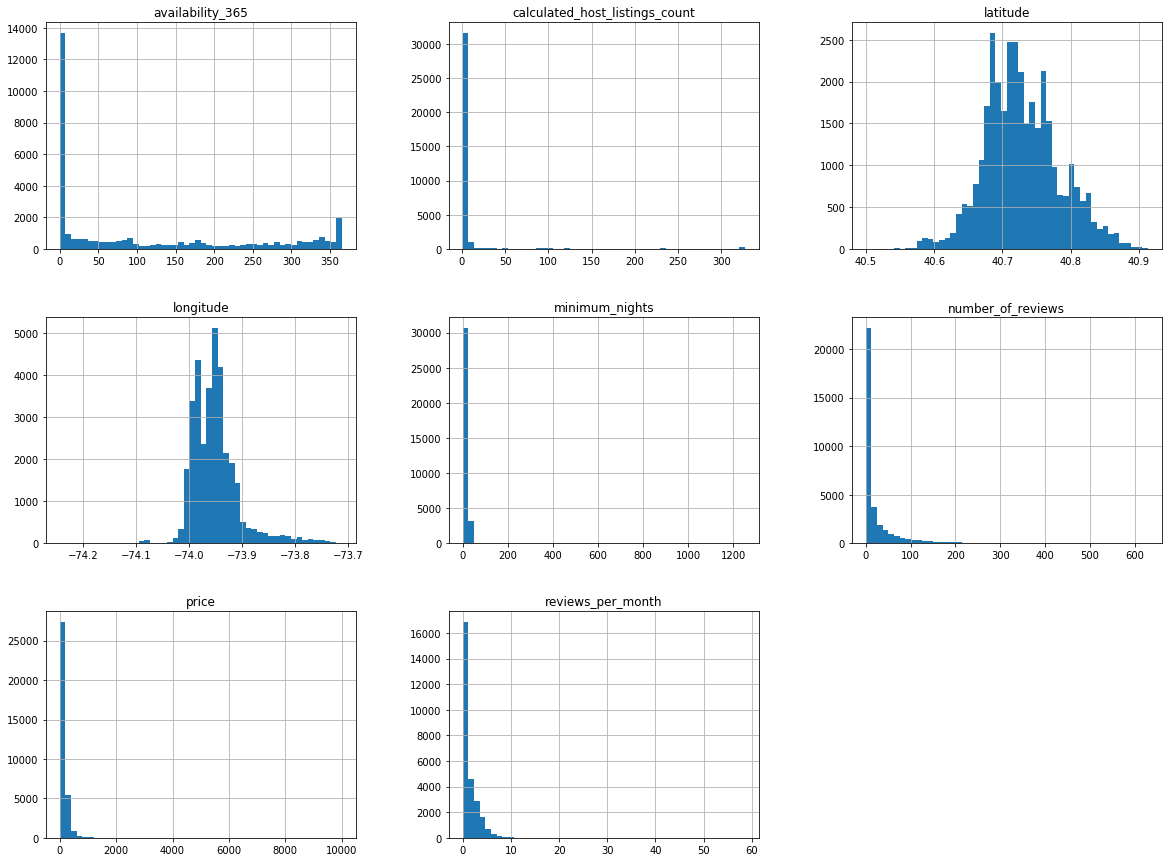

In [128]:
sz.hist(bins=50,figsize=(20,15))
plt.savefig("HIST PLOTS")
plt.show()

**Understand Skewness**

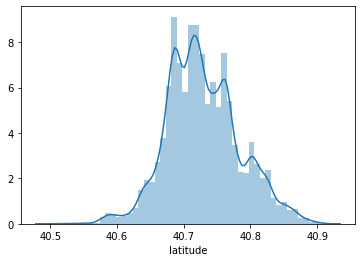

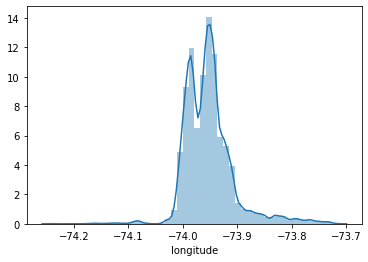

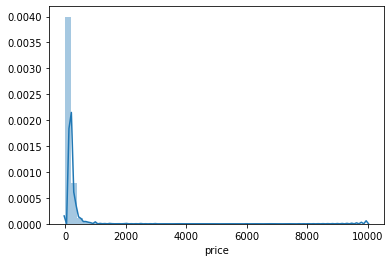

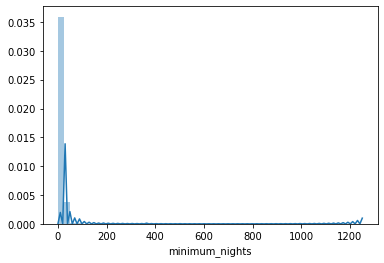

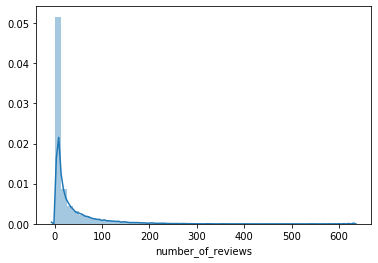

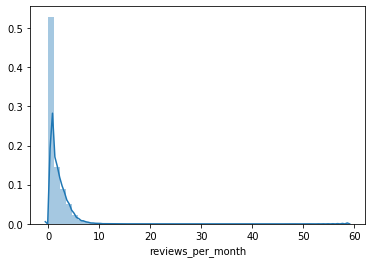

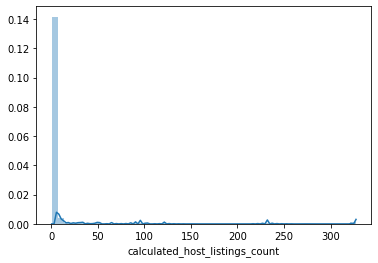

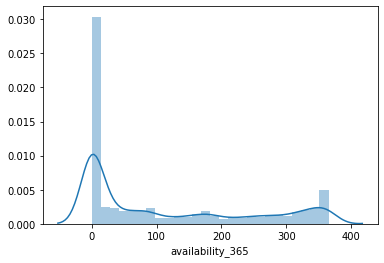

In [129]:
for col in sz.select_dtypes(exclude=object):
    sns.distplot(sz[col])
    plt.show()

**Aggregate data based on latitude & longitude**

In [148]:
#Obtain the neighbourhood information using foursquare api
import requests

CLIENT_ID = 'UPCKISG14BQJFLKHF2QF23KR5CUUFXXAIVBYRIYSIK35PM2W' # your Foursquare ID
CLIENT_SECRET = 'YEPGJWFXVVMFRL2MVPUXXY5FX1ANEXDTJ14K4KNMZ2UN4ZD4' # your Foursquare Secret
VERSION = '20180604'
radius = 2000
LIMIT = 100
venues = []
for lat, long, neighborhood in zip(sz['latitude'], sz['longitude'], sz['neighbourhood_group']):
# Create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(CLIENT_ID,CLIENT_SECRET,VERSION,lat,long,radius,LIMIT)
# Make the GET request
results = requests.get(url).json()["response"]['groups'][0]['items']
# Return only relevant information for each nearby venue
for venue in results:
    venues.append((neighborhood,lat,long,venue['venue']['name'],
    venue['venue']['location']['lat'],venue['venue']['location']    ['lng'],venue['venue']['categories'][0]['name']))

In [156]:
venues_df = pd.DataFrame(venues)
# Defining the column names
venues_df.columns = ['Neighborhood', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']
print(venues_df.shape)
venues_df.head(50)

(100, 7)


,Neighborhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Brooklyn,40.69076,-73.92886,The Wilky,40.688151,-73.927148,Beer Bar
1,Brooklyn,40.69076,-73.92886,Hearts Coffee,40.692155,-73.926602,Coffee Shop
2,Brooklyn,40.69076,-73.92886,Do The Right Thing Crossing,40.689199,-73.933242,Historic Site
3,Brooklyn,40.69076,-73.92886,Papelon Con Limon,40.693969,-73.930147,Food Truck
4,Brooklyn,40.69076,-73.92886,Wonderville,40.692394,-73.927500,Bar
5,Brooklyn,40.69076,-73.92886,Broadway Pizza,40.693314,-73.928931,Pizza Place
6,Brooklyn,40.69076,-73.92886,Santa Panza,40.694609,-73.930765,Pizza Place
7,Brooklyn,40.69076,-73.92886,Blink Fitness,40.689194,-73.923369,Gym
8,Brooklyn,40.69076,-73.92886,Turtles all the way down,40.685035,-73.929571,Bar
9,Brooklyn,40.69076,-73.92886,BK Bagels,40.693813,-73.929598,Bagel Shop


In [151]:
#venues for each neighbourhood
venues_df.groupby(["Neighborhood"]).count()
# unique categories obtaine4d
print('There are {} unique categories.'.format(len(venues_df['VenueCategory'].unique())))
# Displaying Venue Category names
venues_df['VenueCategory'].unique()

There are 48 unique categories.


array(['Beer Bar', 'Coffee Shop', 'Historic Site', 'Food Truck', 'Bar',
       'Pizza Place', 'Gym', 'Bagel Shop', 'French Restaurant',
       'African Restaurant', 'Cuban Restaurant', 'Bakery',
       'Caribbean Restaurant', 'Cocktail Bar', 'Asian Restaurant',
       'Juice Bar', 'Music Venue', 'Deli / Bodega', 'Liquor Store',
       'Café', 'Dive Bar', 'Grocery Store', 'Wine Shop',
       'Latin American Restaurant', 'Park', 'Italian Restaurant',
       'Garden Center', 'Sandwich Place', 'American Restaurant',
       'Used Bookstore', 'Ice Cream Shop',
       'Southern / Soul Food Restaurant', 'Mexican Restaurant',
       'Vegetarian / Vegan Restaurant', 'Thrift / Vintage Store',
       'Tapas Restaurant', 'Gourmet Shop', 'Boutique', 'Yoga Studio',
       'Gift Shop', 'Pet Store', 'Fried Chicken Joint',
       'Indie Movie Theater', 'New American Restaurant',
       'Arepa Restaurant', 'Ramen Restaurant', 'Indian Restaurant',
       'Ethiopian Restaurant'], dtype=object)

In [152]:
# One hot encoding
kl_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")
# Adding neighborhood column back to dataframe
kl_onehot['Neighborhoods'] = venues_df['Neighborhood']
# Moving neighbourhood column to the first column
fixed_columns = [kl_onehot.columns[-1]] + list(kl_onehot.columns[:-1])
kl_onehot = kl_onehot[fixed_columns]
print(kl_onehot.shape)

(100, 49)


In [155]:
kl_onehot.head()

,Neighborhoods,African Restaurant,American Restaurant,Arepa Restaurant,Asian Restaurant,Bagel Shop,Bakery,Bar,Beer Bar,Boutique,...,Pizza Place,Ramen Restaurant,Sandwich Place,Southern / Soul Food Restaurant,Tapas Restaurant,Thrift / Vintage Store,Used Bookstore,Vegetarian / Vegan Restaurant,Wine Shop,Yoga Studio
0,Brooklyn,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Brooklyn,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Brooklyn,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Brooklyn,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Brooklyn,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
kl_grouped=kl_onehot.groupby(["Neighborhoods"]).sum().reset_index()
print(kl_grouped.shape)
kl_grouped

(1, 49)


,Neighborhoods,African Restaurant,American Restaurant,Arepa Restaurant,Asian Restaurant,Bagel Shop,Bakery,Bar,Beer Bar,Boutique,...,Pizza Place,Ramen Restaurant,Sandwich Place,Southern / Soul Food Restaurant,Tapas Restaurant,Thrift / Vintage Store,Used Bookstore,Vegetarian / Vegan Restaurant,Wine Shop,Yoga Studio
0,Brooklyn,1,1,1,1,2,6,13,1,1,...,6,1,1,1,1,1,1,2,3,1


**EDA**

***Univariate Analysis***

**Bivariate Analysis**

***Correlation***

In [138]:
corr_matrix = sz.corr()
corr_matrix["price"].sort_values(ascending=False)

price                             1.000000
availability_365                  0.083439
calculated_host_listings_count    0.053688
minimum_nights                    0.045746
latitude                          0.029195
reviews_per_month                -0.033186
number_of_reviews                -0.048459
longitude                        -0.151930
Name: price, dtype: float64

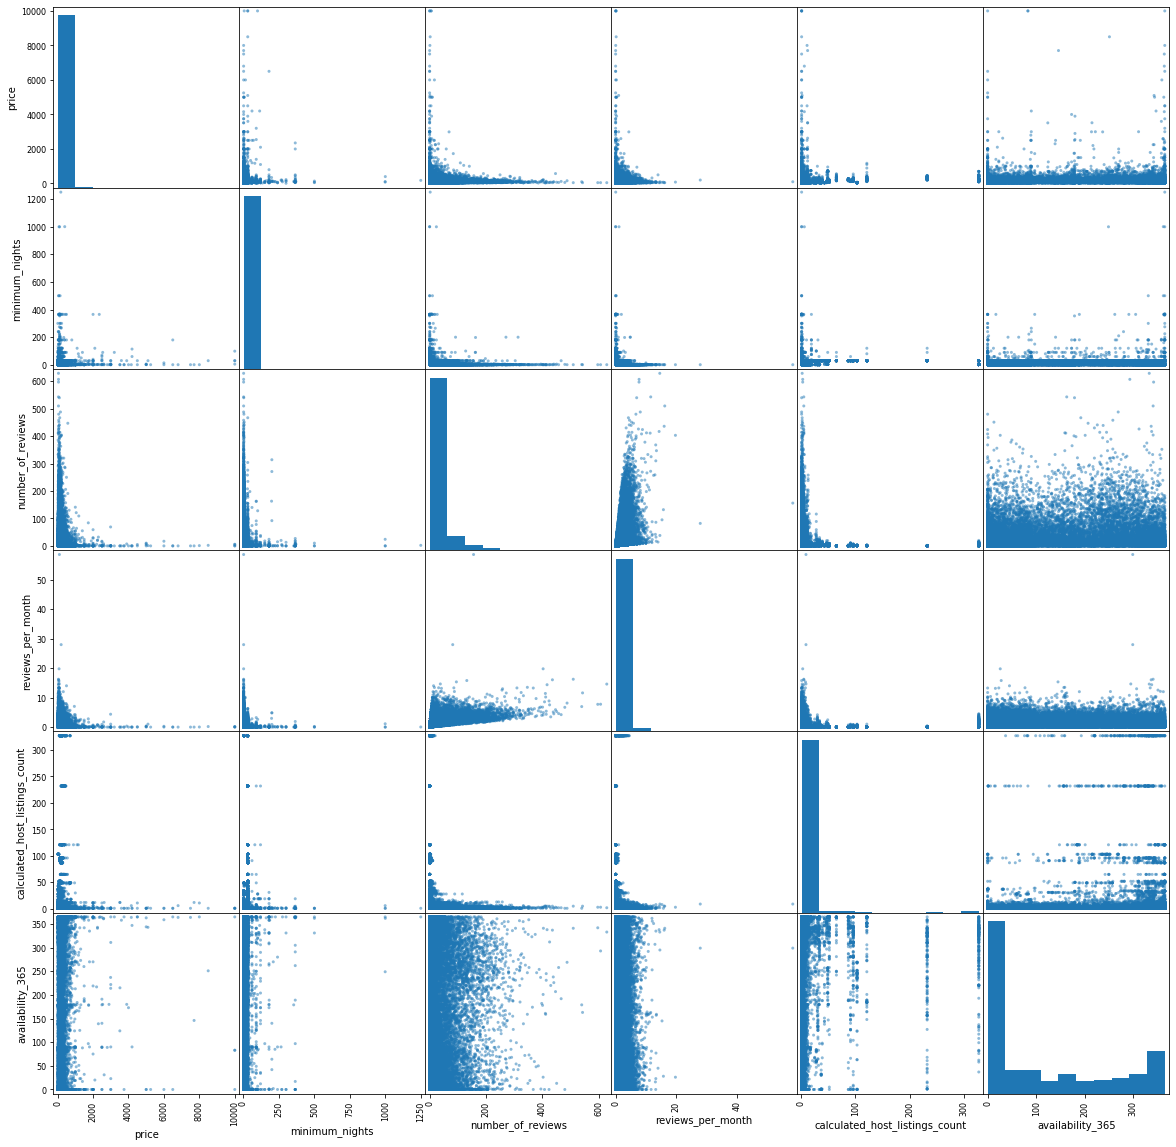

In [145]:
from pandas.plotting import scatter_matrix
scatter_matrix(sz.loc[:,~sz.columns.isin(['latitude','longitude'])], figsize=(20, 20))
plt.savefig('corr.png')
plt.show()

In [140]:
#There is no correlation found

**Data Preprocessing**

**Check for null values**

In [141]:
sz.isnull().sum()

neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       6982
reviews_per_month                 6982
calculated_host_listings_count       0
availability_365                     0
dtype: int64

**Handle null values**

In [142]:
sz['reviews_per_month'].fillna(0,inplace=True)

In [143]:
sz['last_review'].fillna(0,inplace=True)

In [144]:
sz.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

**Check for outliers**

**Handle outliers**

**K-Fold Cross Validation**

**Base Model**